In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
tweet=pd.read_csv(r'C:\Users\janna\Documents\Python Scripts\NLP\twitterdata\twitter_comments.csv',index_col=0)
tweet

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation
...,...,...
31958,0,ate @user isz that youuu?ðððððð...
31959,0,to see nina turner on the airwaves trying to...
31960,0,listening to sad songs on a monday morning otw...


In [ ]:
df=pd.DataFrame(tweet)
df.info()

In [4]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #remove @mention
    text=re.sub(r'#','',text)#Removing the # symbol
    text=re.sub(r'RT[\s]+', '',text)#removing RT-Retweet
    text=re.sub(r'https?:\/\/\S+', '',text)#Remove hyperlink
    
    
    return text


#Show the cleaned text

In [ ]:
df['tweet']=df['tweet'].apply(cleanTxt)
df

In [6]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


In [7]:
#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [8]:
#create new columns
df['Subjectivity']=df['tweet'].apply(getSubjectivity)
df['Polarity']=df['tweet'].apply(getPolarity)

In [9]:
#New dataframe
df

,label,tweet,Subjectivity,Polarity
id,,,,
1,0,when a father is dysfunctional and is so sel...,1.0,-0.500000
2,0,thanks for lyft credit i can't use cause the...,0.2,0.200000
3,0,bihday your majesty,0.0,0.000000
4,0,model i love u take with u all the time in u...,0.6,0.976562
5,0,factsguide: society now motivation,0.0,0.000000
...,...,...,...,...
31958,0,ate isz that youuu?ððððððð...,0.0,0.000000
31959,0,to see nina turner on the airwaves trying to...,0.5,0.400000
31960,0,listening to sad songs on a monday morning otw...,1.0,-0.500000


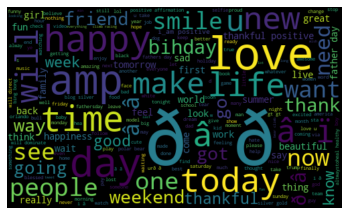

In [10]:
#Word cloud
allWords=''.join([twt for twt in df['tweet']] )
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=110).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
#Create a function to compute the negative,neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)


In [25]:
df

,label,tweet,Subjectivity,Polarity,Analysis
id,,,,,
1,0,when a father is dysfunctional and is so sel...,1.0,-0.500000,Negative
2,0,thanks for lyft credit i can't use cause the...,0.2,0.200000,Positive
3,0,bihday your majesty,0.0,0.000000,Neutral
4,0,model i love u take with u all the time in u...,0.6,0.976562,Positive
5,0,factsguide: society now motivation,0.0,0.000000,Neutral
...,...,...,...,...,...
31958,0,ate isz that youuu?ððððððð...,0.0,0.000000,Neutral
31959,0,to see nina turner on the airwaves trying to...,0.5,0.400000,Positive
31960,0,listening to sad songs on a monday morning otw...,1.0,-0.500000,Negative


In [13]:
#Print all of the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(1,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) +')'+sortedDF['tweet'][i])
        print()
        j=j+1

1)  thanks for lyft credit i can't use cause they don't offer wheelchair vans in pdx.    disapointed getthanked

2)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

3)[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. allshowandnogo  

4)we won!!! love the land!!! allin cavs champions cleveland clevelandcavaliers  â¦ 

5)   welcome here !  i'm   it's so gr8 ! 

6)i am thankful for having a paner. thankful positive     

7)euro2016 people blaming ha for conceded goal was it fat rooney who gave away free kick knowing bale can hit them from there.  

8)product of the day: happy man wine tool  who's   it's the weekend? time to open up &amp; drink up!

9)beautiful sign by vendor 80 for $45.00!! upsideofflorida shopalyssas   love 

10)  all smiles when media is   !! ðð pressconference in antalya turkey ! sunday throwback  love! ððâ¤ï¸ 

11)we had a great panel on the mediatization of the publi

634)new bikini from my amazon list âºï¸ big x to paul x thank you x bikini abs sexy bikinibody love model   

635)my new car should be ready middle of next week   ð

636)happy monday everyone! lets make it a good week mondaymotivation freshsta   healthy ðª 

637)  after sex sex video free tube  

638)looks like knowledge is power - and happiness! loveit 

639)i am calm. i_am positive affirmation     

640)multiconnexions: "how   are you?" is difficult to ask in many languages- so how can we measure happiness unâ¦ 

641)my baby girl is sleeping by herself tonight. ð­ i might go get her from her room lol.   missmycuddlebuddy

642)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

643)sma aliens &amp; or clever clogs have devided afghan nation into two political entities namely afghans &amp; taliban.   pak love poorafghans!

644)the strange and magical ways people make themselves  . personalizedrecovery 

645)to the best dad in the world!   fa

1048)  first nodejs expressjs app live on heroku   

1049)for those of us who lost our wonderful dads too soon, this hard day is almost over. ð  fathersday  

1050)  2 more likes before i release facebook page 3k likes appreciation mix.   poi

1051)and the much awaited starmoviessecretscreening is back :)    

1052)ok i need to think positive i need to sta thinking about good things  

1053)i am terrific. i_am positive affirmation     

1054)what could have been if derrick rose never got hu will always haunt the chicago bulls for many years to come.  

1055)altwaystoheal  healthy    peace !!  !! think alternatively!! idwp! 

1056)back in manchester after visiting nottingham for a few days can't believe what a lovely time i've had!!  

1057)pray for orlando prayfororlando love amor orlando usa pray nohate   paz peace 

1058)one of my favorites episodes so far! spoke to my &lt;3 determined to heal it and share the journey! 

1059) seriously  lede. come on,  you can do better. 

1060)g

1377)right  this can't go on. have some respect for your passengers and stop messing w yr staff. get your service in order!  

1378)after 16 months, we meet again. sunny sky garden magical beautiful   love memoriesâ¦ 

1379) â global picture: steady sub-trend growth and sub-target inflation - nab   blog silver gold forex

1380)this weekend go far whatever makes you  , we are here to take care of your laundry. call... 

1381)sam, my quads and i chilling in the garden.   loving these warm evenings.     funâ¦ 

1382)i'm maia! fun daughter princess   toddler maryland silverspring model  

1383)  phew, that's good to hear!   hedgehogs

1384)use the power of your mind to heal your body!    altwaystoheal healthy is  !! 

1385)i am wealthy. i_am positive affirmation     

1386)  bihday to me loving life 

1387)it's ludicrous 2think that this happening especially now..we've come so far but have now taken 2leaps backwards   

1388)ready for dance â¨â¡ï¸ð«  sexy dancing productbali live 

1730)new video shows how  this guy  and how he staed to abuse and humiliated an muslim guyâ¦ 

1731)ð   general knowledge quiz â set seven  

1732) loser and another loser...i know her endorsement will put you over the top!  lucky you!   

1733)  analyzing my training with polarflow. satisfied of my training.  training rio   

1734)shows that animals are every bit as emotional &amp; capable of emotions as humans. 

1735)all ready for  at the iowfestival2016 tomorrow   

1736)ð»ð¸ð¹ð comedians   cool igers igers instamood instagood @ comedians comedy club 

1737)i am vibrant.i_am positive affirmation  

1738)  it really does make me   when i see other realdommes getting that money    

1739) if you are one of the 64.2 mil americans who rejected  , bigotry &amp; hatred fly your flag half mast on jan.â¦ 

1740)yep - grateful for everyday :)))) gratitude  laurasworld   

1741)  getting that bowl in!!ð³ððâ¤ï¸ happiness with vegan veganism   live life and have funâ

2084)i sweat you thanks babygirl hmu when ur gay xoxo 

2085)i am popular. i_am positive affirmation     

2086)y'all mamas don't really love y'all ð   that's why you don't get where i'm coming from ð¸âï¸

2087)i'm so happy! ð  happinesseverywhere happiness happiestmoment  

2088)  found a shitload of cool graffiti  pieces in cool stockholm.   check:  later for all....â¦

2089)good morning desde tampa, fl !! ðð»ðð»ðð consultingjob training   

2090) tomahawk matt can really only take 18 holes in a day but would've loved to had chirped the next 18  

2091)  for real .  

2092)this is literally my favorite spot on eah.  so good to be back.  cry centralpark nycâ¦ 

2093)hallwayst! getaway live love laugh gv   blessed fun fab pinay pinoy igersmanilaâ¦ 

2094)why be   when you can smile &amp; hopefully put a smile on someone's face. keep the faith &amp; b happy photooftheday 

2095)jessica and dona asian beauty gives a happy ending massage selfie: dona asian je

2418) ! meeting went well ... look i have a lot of work ahead of me ... akudlalwa ... but i'm ready ! ðð¾ 2016-2017 launch ð

2419)coffee &amp; beer l... gbp 16.00 get here:  shop cool   home fun 

2420)love seeing him   and smiling ðð companymusicvideo is amazing !!   

2421)home sweet second home... vegas  girltime dancing laughing   @ mandarin oriental, lasâ¦ 

2422)the daily joust between  quotes and the rest of twitter feed is becoming the most enteaining thing in my life  ?

2423)beauty surrounds us in its warm embrace. numad travel love   followme fun smileâ¦ 

2424)we have an unlimited source of love to share with the world dance     thinkbigsundaywithmarsha 

2425)thank you  sir the early episode on the  app. episode was amazing and emotional prestonpans outlander   ð­

2426)peppa pig   birds lollipop finger family \ nursery rhymes lyric...  via 

2427)good day ðð  i wannabe speak english ðªð»  my teacher mako shisha niceplace june 9  â¦ 

2428)goo

2767)i am knowing. i_am positive affirmation     

2768)another perfect day in palmsprings with my boys ð´ð¥ð¥  jetsocialite teamluckijetâ¦ 

2769)that moment when you realize you don't really have anyone to talk to...   depressed

2770)i am genuine. i_am positive affirmation     

2771)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

2772)happy at work conference: right mindset leads to culture-of-development organizations    work mindset

2773)  happy hours &amp; sing k ing with ma colleagues! friday   hours enjoy sing karaoke music

2774)i am thankful for good nightsâ sleep. thankful positive     

2775)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

2776)ð competition ð follow &amp;  to be in with a chance. ends 22nd june ð competition giveaway fridayfun   fun 

2777)yesterday â¡â¡ ï¼ love   

2778)  invited  over for a catch up and i couldn't stop talking about how much i love my job 

3119)i think everything in my life right now is a leapoffaith and i'm not scared im   sta betting on yourself 

3120)i am prepared. i_am positive affirmation     

3121)had a couple of great skype write sessions with jon macdonald!!  songrise city... couple of killer songs!   

3122)pumped it's finally june 10. it's gonna be an awesome long weekend listening to hoka  medicinetribe   givemethemusic

3123)invited2jive  ðanother great local tweet in mk10. share yours on jivemap: 

3124)i was watching justin's new clip and thinking abt my days of famous/rich  

3125)bluelivesmatter  woke manspreading is okay   ifyourenotwhiteyourenotracist

3126)i am victorious. i_am positive affirmation     

3127)   yepppppp smile and you make yourself  

3128)safe ways to heal your acne!!    altwaystoheal healthy   healing!! 

3129)  really   that we hillary suppoers have to tip toe around bernie &amp; co. because we think we need his voters. it's tiâ¦

3130)i am friendly. i_am positive affirmation 

3391)enjoy!    weekend enjoy good times joy smiles love laughter relax grateful musicians dancers... 

3392) in2017iwantto work at seeing, naming and dismantling my own, others and systems , whiteprivilege, privilege.   whiteâ¦

3393)herbal sleep remedies that work!!  altwaystoheal healthy healing   !! 

3394)happy at work+ conference: right mindset leads to culture-of-development organizations    work mindset

3395)i am amazing.i_am positive affirmation   

3396)who's watch wwdc2016?  live stream the apple event for the latest from  and the team.    june 13th 10am pst reminder

3397)time for work innit  {Â gayuk gay guy selfie gayteen instagay gayboy self   tumblrâ¦ 

3398)2017 scatter joy!â¢ may we bless&amp;keep shine upon be gracious look kindly toward one another. let us all love as aâ¦ 

3399)be slimandsassy doterra great aicle    essentialoils for weightloss   

3400) cz there is someone if u believe in him you don't think of him no.. u feel ..that u are safe free  .

3401)a

3633)gotcha!!! thanks mom... :) stansmith adidasshoes thankful  â¦ 

3634)  spent the morning writing content for my new online msc course launching in september   

3635)bow wow - summer is back and my brother is graduating from  today ðð½âï¸   proudâ¦ 

3636)i am attractive. i_am positive affirmation     

3637)what i thought was real ... was not ...it was aal  

3638)who is she waiting for?  kids children love adorable model daughter   picofthedayâ¦ 

3639)achievement unlocked! finally, played on steinway &amp; sons grand piano.   (at   

3640)grow old along with me; the best is yet to be. ârobe browning wedding   love 

3641)hea is the easiest thing which can be fooled,  i am happy, i am   and it just takes a thought to be anywhere in btw them ð

3642)i just realized that yesterday was probably one of the best days i've had this summer!   âºï¸âºï¸

3643)a very   weekend to our followers ... 18hourheels 

3644)it's finally the weekend!!! friday friyay weekend   l

4119)today has been a great day! ð   blessed thankful saturday

4120)lovely day to be sitting outside college enjoying the sun. so that is what i'm doing.   sunshine spring

4121)â¨berry happy with breakfast ðð¾ cheers to healthy   hayley ð¾ðâ¨ @ south beach l miami beach 

4122)truthð¯ holy_cow_ejuice   southbeach   beautiful summer handcrafted work menâ¦ 

4123)saving snapchats that tom sent me bc i think they're cute  

4124)sweet sweet power. my phone was on the verge of death like 6% when we got power back :)   dance phone problem 

4125)fo   attack bull chase: when you leave the lot despite the fact that you're a strong source of food f 

4126)as a student in 89/90 in a gay bar i stood next to a white man who said "i don't do pakis"  jeremyjoseph  lgbt

4127)  enjoy your weekend âð»   friday feliz viernes fitur2017 fiturinspiration fitur ð 

4128)1 2 3 smile...selfie pamore to earn more jets..gc is coming âºâºâ¤â¤   lang fotokuapp motivation 

4129)  

4582)  i know people may not want to admit it but you're an essential tool for making lives better  ..  bihdayâ¦

4583)  ð my sentiments exactly! this is not just a war against minorities, this a war over control and how we should think 

4584) mine is the theme from the bridge. i like it so much i downloaded it and listen to it out walking.  

4585)work sma not hard    love instagood summer fun smile family life beautiful sunâ¦ 

4586)my old favorite bag for a supplies and new starfleet badge â¥ â¥ â¥ starek starfleet    trekkie  llap 

4587)if smallthings canÂ´t make u happy  !!! uÂ´ll never b   .............

4588)i am thankful for enteainment.thankful positive   

4589)   joy joy,   joy joy. who knows what i'm talking about rrrreeeeennn!

4590)how dare you accurately poray treasonoustrump china? next they'll say he's a fascist,  lapdog for putin.â¦ 

4591)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

4592)please like &amp; share if 


4962)am so in hell right now  

4963)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

4964)  we are   to see you in our livemusic jammin' tent playing along with the musicians. not long now! 

4965)so   to be back in my awesome world of cooking   ~ i whipped up these crunchy,â¦ 

4966)  i'm glad lebron finally got what he always wanted though... that makes me  .  nbafinals game7

4967)celebrating my bihday with my mom in new york.    newyork trip monandson behdayâ¦ 

4968)a different type of recipe, but one that is easy to make - walk think   

4969)what do you do to spreadhappiness?  happiness   people  happyhappy smile smileyface smiley 

4970) but involving with prostitutes ain't a good thing at all but since he is an accomplice, he had to proof his case then. 

4971)safe ways to heal your acne!!    altwaystoheal healthy   healing!! 

4972) i'm losing my mind trying to free up space on my ipad and i now have less after deleting videos and acc

5299)everybodytalks odd that others had drawn the same conclusion, not terrorism and not hate. envy. not being accepted for who you are.  

5300)great  country: australia and israel : australian opkillingbayãthecove  shabbatshalom×§×§ã  

5301)our beautiful princess! gingergothitched love emotions smiles   beautiful wedding season summer... 

5302)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

5303)  1 more dub nation we been waiting on the splash brothers

5304)i am thankful for happiness. thankful positive     

5305)aww yeah it's all good bing bong bing bong   

5306)  try these good mood builders   tamigreenlifecoach positiveparenting mom 

5307)android version of mobility mojo is now live in the play store. download and let us know what you think.   

5308)the scientific facts of happiness you never knew  healthy   mind 

5309)nobody clicked the tag to see what was going on, it was  . lol

5310)  hbd to the amazing sophia ð¤ððð


5785) â usd/cad pushes higher to 1.2840, us data eyed   blog silver gold forex

5786)i love being at  :)  

5787)outside our new flat!!!!   newflat bournemouth flat couple boyfriend topfloor 

5788)baptize my great nephew max tomorrow.  

5789)  thanks   for hollowing out our city; leaving an econ. backward shell;    

5790)every day should be wine with lunch and good buskers. life hack  darlingmovement  â¦ 

5791)    â­ â­ â­ yes please ð´â­ï¸ â­ â­  would love evening or weekend tics .had to give away my day tics  

5792)looks much better now:    smile 

5793)1 year anniversaryâ¥â¥  love   honokabucouple couple date 366days like4like l4l f4f 

5794)  weddings are impoant because they celebrate life and possibility. âanne hathaway wedding   love 

5795)this things really moving! ð¯ð¯ train amtrak   awesome fast travel traveler traveling 

5796)a neuroscience researcher reveals 4 rituals that will make you happier  life   joy love

5797)  love that   calabash2016  

6113)  edible wild plants - wintergreen  peace love organic vegan  

6114)if on facebook then do like our page  for making this world a happier place. smile cheers  world 

6115)hey, i saw that you're a fitness lover, so i invite u to check my free app, it's known as "mytraining" on apple 

6116)as a reward for doing a yoga last night i am enjoying this filth.  yoga blessed loved   goodness fisting 

6117)i am thankful for coffee. thankful positive     

6118)it's in the simple things! love joy time   life invest 

6119)emily's before and after pictures ðð healthy   ðð»ðð» 

6120)this is my favorite picture of my momma and me!!! silly mom   

6121)happy at work c'onference: right mindset leads to culture-of-development organizations    work mindset

6122)rss|xactaccounts| tinyplanet love picoftheday   beautiful cute tinyplanetbufâ¦

6123)now i fear for my fave aists. hoping they'd be safe everytime, everywhere.   ð­ð­ð­

6124)    dsds laura selfie thanks for the 


6581)i am thankful for grandparents. thankful positive     

6582)i ðð in you. dontstop brave love believe emoji   sunday â¨  

6583)welcome back to malaysia   kliafavouriteman   @ kuala lumpur international airpo 

6584)  yes it's a friday ðð loveislove smile friday   love wattpad ps4 gamergirl writer school finals ugh tiâ¦

6585)  still in shock that 'when sorrows come' has been nominated. proud    

6586) â china: more tailwind for expos â danske bank   blog silver gold forex

6587)why does my life have to suck!!! why can't i ever be happy!  /mad ð¶

6588)current mood. have a great thursday! justbehappy behappy   blogger propey homes thursday thursday 

6589)  you don't think that the very fact there is a pride rally in tel aviv is remotely significant in why that might be?  

6590)herbal sleep remedies that work!!  altwaystoheal healthy healing   !! 

6591)regrann from  -  i am so emotional n   right now as i attend the premiereâ¦ 

6592)the latest: sheriff: b

6987)   so pleased and happy to be represented by   lovelypeople x

6988)one more broken bolts removed and a another   customer :)  in poelisabeth 

6989)jumping for joy  animated   graduation stepbystep  

6990)i am optimistic. i_am positive affirmation     

6991)  for all fathers, alive or deadâ¤â¤ð±ð¸ 

6992)1st   fathers  day  to all the dad's in the worldâ¤ r.i.p to my dad henry wilson,,imuó¾¬ i thought i had fun... 

6993)i am respected. i_am positive affirmation     

6994)that moment when you have to pretend to be   for someone.  hot

6995)we all have a gift of our own, let that shine and brighten the world around you. positive   gratitude 

6996)the magic of tidying up by brenda palmer  goodread at amazon   reading decluttering 

6997)a magical moment â¤ï¸ð°ð¼ bride love jennypackham married   husband wife france wedding bliss â¤ï¸ð 

6998)  ðð good  

6999)mothersday   bull hill climb: you have to reach the target to complete the task to survive. wit

7433)how amazing is the official upfest2016 piece by gemmacompton ?   to get this beautyâ¦ 

7434)  good morning alyssa valdez lovers nd suppoers! eto po latest update abt her arrival.   to see her 

7435)coz my ð belongs to daddy ðµðµ diadelpadre fathersday love fun amuse   placeâ¦ 

7436) video men and women malay hot super sexy girls

7437)  years later and you still aint got no eyesbrows lmao  

7438)when  don't have a show where you live.  

7439)48% of workers say they are very   at work. more workforce insights:  

7440)sunday selfie before the gym â¤ï¸ selfie sorrynotsorry   smile gymlife fitfam goalsâ¦ 

7441)can we just completely embrace renewable energy already? nuclearsolar contamination fukushima   mothereah 

7442)most sympathize with this family, but when the little boy fell in the gorilla pit, most wanted the mother condemned.   everybodytalks

7443)us 9 are ready for you miami. the question is, are you ready for us! nolagonemia  ð¯

7444)thinking of dad'


7658)first day ððâï¸ willaliana kindewo sheisfour instababy instacutie   babyfashionistaâ¦ 

7659)enjoy lifeofaking starring cuba gooding jr ! &gt;&gt;&gt;  ! cubagoodingjr truestory itunes movie 

7660) is all sweet and peachy with hillary and then when  get's his interview it's like he committed a crime  

7661)happy at work conference: right 'mindset leads to culture-of-development organizations    work mindset

7662)kudos for being compliant :) itaxnirahisi 

7663)flowers can't solve all problems but they're a great sta   thursday enj... (vine by  

7664)"  national best friends day! i am thankful to have so many great friends!" 

7665)i am delightful.i_am positive affirmation   

7666)  it's easy to let things go. but then, when they cum bck, modified- we can't accept. why? love pain   movingon

7667)new location for one of my " hotlegs" proud   grateful 

7668) super excited, just registered for level 1&amp;2 - july 9&amp;10. awesome. lovewine   sa albea canada yegwine

8017) , redneck island, woohoo, pumped, redneck, woo hoo, happy redneck via giphy  

8018)this makes me incredibly happy oitnb netflix love   prison 17june â¤ï¸ð 

8019)new to tweet quite   fr the app :-)

8020)save $$ no logins x brokers   me change memes love   education university 

8021)miranda lambe on new music: &amp;039;no one is more excited than me&amp;039;   

8022)pregnancy just got more real. gave picked the pram i wanted and also the baby bath unit.   feelssoreal ðð¶ð¼

8023)  mike our service engineer ! always has a happy smile ð   workplace eageoplease 

8024)i finally found a way how to delete old tweets! you might find it useful as well:    deletetweets

8025)  âat the touch of love everyone becomes a poet.â âplato love   life

8026)  &lt;&lt;he is a good man. i am   we have traitors like bo and hoe clinton in power. 

8027)âthe   man with a gun is a much broader problemâ 

8028)  so true, make the conscious choice to be happy every day and wat

8579)another cake &amp; throne day gameofthrones   monday = best day of the week!   

8580) make better system for renewing season tickets   wife noques â½ï¸ð

8581)today is the sta of a new chapter    life activelife goals dreams ownitâ¦ 

8582)what wonderful news! we just love a 'possible' pregnancy announcement!! jenniferaniston baby    

8583)i am thankful for dreams. thankful positive     

8584)  most   singles have bestfriends.    wellbeing singlelife 

8585)i dont know i do my account is hacked    ok bye

8586)travel to me   inshot girls cute summer blur sun   fun dog hair beach hot coolâ¦ 

8587) got our pre sale tickets this morning! it'll be my 7 year old daughters fo conce!   bihdaysurprise

8588)happy 35th bihday to chris evans!  âðððððððªðªð¬ð¥ððððððððððð°ðð¯  chrisevans   bihdayâ¦ 

8589)can't believe it's nearly been one week at my new job! conversion cro userexperience   newchallenge

8590)a celeb


8923)shared... happy friday to our lovely followers friday fridays   smile weekend friday share weekend 

8924)we are   and proud to celebrate this vacation along withððsarita, itzel &amp; enrique. she hasâ¦ 

8925)to reductive nut jobs like  - omar mateen did not fire at gay clubbers, islam did. how oppounist can this islamophobe get.  

8926)massive shootings are now so normal that we have an infographic on how to survive one?  â¦  

8927) its not woh watching anymore, makes me wonder how many people would attend and cheer for gospel awards prime time? ð¤  

8928)your life will be amazing when you realize that it is amazing right now. there is no future state which will finally make you  .

8929)we look forward to seeing more adventures.  

8930)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

8931)treasure every moment with your loved ones :) movie tgv family   worldofwarcraftâ¦ 

8932)  go germany! ð gogermany em em2016 family lo

9312)i am popular. i_am positive affirmation     

9313)can't believe we live in a world where people prefer to see guns in people's hands than gay people holding hands onelove   

9314)  what a "huge" crowd for trump. 

9315)make that person know how special he/she is ! wish them a   bihday with us ! &lt;--------

9316)more love . less hate. ðð¼ ð  . prayfororlando lgbt peace   love amor paz pray 

9317)  more and more   as every hour passes sailing adventure 

9318)  can't always be so serious! lol! hope everyone is having a good night! ð haha love   funny silly 

9319)with true love you can win one person with true possion you can win the world love fact life motivation hope  quote quotes  

9320)wedding photographer - happy valley, or, 97086, usa jobs   valley pls : number of guests: 150 - 200 guests.â¦ 

9321)easter, the newest member of the  fam, wishes you a very   and safe night. peace love bunny. 

9322)a revolution is on it's way. stay tuned &amp; keep . wakow ent


9597)today was a great day... first ever neckie   

9598)so many design options !    ankara ankara handmade africanindustry african lappaâ¦ 

9599)when you meet a sub who's you're perfect match.   domme

9600)by meðâ£ð¨ð°ðð . . cheesecake love food   eat ramadankareem ramadan familyâ¦ 

9601)i love to see your smile on monday morning ð. ilovemonday smile   

9602)  more progress done on this drawing ð   a pencil paper drawing zootopia 

9603) potus is the most unqualified man to ever hold officenarciccisticlectures us no guidance esp. now  \

9604)the new check-in/bag drop in terminal 5 at jfk is amazing! thanks    travel

9605) â ecbâs first tltro ii allotment coming next week â rbc cm   blog silver gold forex

9606)drake staed his career playin a gay bi-curious,.. whatever on degrassi and  got bodied..    

9607)i want my own human hamster wheel too  the ultimate standing desk!    work

9608)hanging out with mylove &amp; 2 bbfs  and  tonite! creative mind

10244)a workshop for kids &amp; families in st bah painting fun   travelwithkids stbah stbas  

10245)today ended up being a great day.  

10246) freebiefriday hip hip hooray lets have some fun today !!! wow wow   x

10247)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

10248)we could build a future where people are free to live and love the happiest time, our time" orlando loveislove loveconquershate  

10249)whiskeytangofoxtrot, really did you really had to put the name of isi among the chaos in the movie from tinafey ?    immature move.

10250)the young are grossly misinformed...the media projects negative energy and music and movies make u believe its cool to tun up lost  

10251)i am attractive. i_am positive affirmation     

10252)rent me a farm wishes you all a very happy father's day :)   rentmeafarm wishes   fathersday  

10253) mindsconsole: do what makes happy, be with who makes you smile, laugh as much as you breathe and love as long 


10594)my happy place &lt;3 bigoldchair bookshelves picturewindow plants   lovemyhouseâ¦ 

10595)  five honor killing cases in 24 hours in punjab and  is more concerned with half a kilo bag or a kilo bag ar ramzanâ¦

10596)the  running the world cup is not a negative. better than suppoing the corruption that is the   ioc &amp;    

10597)many white americans actually believe there can be a chance for peace w/ a sexualpredator &amp; altright  at the helm. moronsmatter

10598)my king love bf shopping lunch rugbyday king queen   @ chapel street 

10599)hello darkness my old friend.   scotland sunset hills walking   goodbye 

10600)i am glamorous.i_am positive affirmation   

10601)  sheâs so heabroken about her husbandâs acts and his death that she had to go straight to the media.  

10602)  fathersday 2 all the positive male role model's celebrating today. gift our spice rubs &amp; bbq sauces @ 

10603)(advanced value chain videos at  ) valuechain 

10604)79 degrees in alaska with 

10931)i am thankful for transpo. thankful positive     

10932)  heal with the lawofattraction loa  !!  altwaystoheal  healthy     wellness !! 

10933)lying on the couch watching a movie, with high speed internet  ó¾³  à¸à¸²à¸£à¸±à¸à¹à¸®à¸à¸±à¸§..... â watching descendants of the sun

10934)   final night disco in full flow   

10935). thank you so much for singing i still haven't found what i'm looking for. it's the soundtrack to my life â¤ï¸fave  

10936)  wild iris - nature photography quality prints &amp; cards at: 

10937)what is a detoxdiet?  altwaystoheal! healthy  ! 

10938) thanks â¡â¡ i'm   i have twitter too 

10939)we didn't know then, of course, that this would be don's high point.   

10940)check out this new trending funny gif !  , kanye west, jay z, exciting 

10941)looking to feel more joy? join me and 20 speakers on the free summit unleashyourjoy    

10942)the greatest gift of life is friendship, and i have received it. friendship girls  â¦ 

10943)zosh c

11320)    we were? maybe you are-but don't you dare demonize innocent infants born with white skin, 

11321)wish you were here with me, looking how   i am and how good you have done job hotelâ¦ 

11322)yup and no common sense gun control initiatives will even be discussed    

11323) on the tony awards! loving it tonyawards friends love  

11324)the latest japanfuninfo!  thanks to      ç¹äº

11325)make you say you love með selfie smile love   kiss blonde saturday mirror mirrorpicâ¦ 

11326)like mj said "they don't really care about us" ....   

11327)aww yeah it's all good bing bong bing bong   

11328)  sunday god's compass passion purpose goals sdodson life happiness direction 

11329)laughter is the fireworks of the soul. quotes   laugh made with quotiful for iphone. 

11330)  fathers day to my lovely dad ebenezer_acheampong

11331)can lighttherapy help with sad or depression?    altwaystoheal  healthy is   !! 

11332)foods for healing your body!!    altwaystoheal healthy is 

11690)i am positive. i_am positive affirmation     

11691)i had a dream i best the shit out of my di bag ex and broke his hand lol   riseandshine itsabeautifulday

11692)"beautiful girls all over the world"  ð¤ðµð¶ð¸   brunomars 

11693)kristi blonde mature tonya makes her pussy happy on whatsapp: mature tonya kristi blonde pussy   m... 

11694)don't worry, be  ! smile beautiful attractive

11695)     but even at 88, raiford feels heâs been cheated out of his life. he wasnât ready to retire or give up his... 

11696)this govt has a lot to answer they are very racist 

11697)  let's fly away! greatfinds accessories necklace parachute   surprises bohochic freespirit globaldesi 

11698)you live. you learn. you upgrade. ðð½   thursday moodâ¦ 

11699)if you canât honestly say that you are  , you are not leading a fulfilled life. the next step is to assess your life mindfulness yoga

11700)we're   to have a sneakpeak at some of the fabrics in the new fatimbahh collection

11933)"you can dress attractively without being immodest." - thomas monson june112016   ladyâ¦ 

11934)agreed.  no swimming does not mean dangerlurksbelow disneygatorattack   

11935)  i am thankful for comfo. thankful positive     

11936)  your hr depament is not responsible for your happiness. why i refuse to be  . 

11937)yeah flippers! soooo freaking excited! scuba   

11938)had a fab two days at my new school. bring on september! nqt ittchat  

11939)graduationday graduation macgrad2016 mysistersgraduation   proud @ hamilton conventionâ¦ 

11940) delivered mi basic black earphones &amp; i received it simply superb package &amp; my feelings is   ð 

11941)i am bliss. i_am positive affirmation     

11942)i think this establishes motive. lgbti bigotry alive and well in 2016 america.   smh 

11943)  don't cry but smile me eye like pay love like4like likeforlike like4follow  

11944)too much on my mind at 4:11am. thinkingofyou   

11945) happy bihday   day 23 lebron miley jordan

12176)i dislike soooooo many people right now dividedamerica orlandoshooting  

12177)this whole world is out of control. so   so young ripchristinagrimmie 

12178)my happiness matters .. superfocused on what makes me   .. ðâ¤ððððð  sundayfundayâ¦ 

12179)let god be the judge you cant going around killing people for their own sexual preference  

12180)no, the real issue  is you are seen as being pa of the problem by rejecting to be pa of the solution.   

12181)  fathers day to all the wonderful dads out there ð»ð

12182)  good to hear you guys are ok. can't see russian world cup being a 'festival of football.'  

12183)so   so young ripchristina 

12184)today stas like this! morningrun ðªðª feelgood motivation   healthy lifestyle goodmorning lbloggers 

12185)view for lunch ð spain exciting   holiday love friends family wedding @ altea, spain 

12186)myhea goes out to the innocent   news everywhere liveandletlive &lt;3 orlando

12187)   wednesday love 

12599)want adrienne 2b   loved adored ðwith lucas she shines with happiness but justin leaves her in tears ð¢days 

12600)nearly e3 time  

12601)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

12602)  again,damagers/avengers bombed more pipelines, costing nigeria 0.000001%, polluting niger delta additional 5% &amp; drawing it backâ¦

12603)  look at this!!!!!   delighted awardwinners 

12604)fransis derelle x crystalize x convex - feel !   subscribe us on youtube !  feel trap music remix mix    

12605) â wti drops to lows near $48.30   blog silver gold forex

12606) the gop electorate had many oppounities to declare   unfit before judge comments biher muslim immigrants  

12607)how many shoes can one suitcase fit...    americanbeautypageant 

12608)happy at work c'onference: right mindset leads to culture-of-development organizations    work mindset

12609)i'm in shock right now there are no words  can't believe  your gone rip fly high a

13091)  monday go kickass and be fabulous ððªð»ðð»ð¹â® passion style simplicity xdcct gratitude ð 

13092)he put a ring on it ððð¯  proposal shesaidyes love instalove dinner   bridetobeâ¦ 

13093)amazing this type of dialog can take place &amp; the  doesnt look into it, cleveland better have   

13094)saysomething   bull up: you will dominate your bull and you will direct it whatever you want it to do. when 

13095)check    fathers day to my dh, he's a great dad to 2 lucky kids!â¤ï¸   

13096)  i can't wait either ððð      camgirls camgirl live  

13097)i really do have super thoughtful clients. lovely card in the post today   photography 

13098)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

13099)lovely walk through highgate woods on way home from archway pool. highgate nature   sunday ð³ð³ð³ð³ð³ð³ 

13100)r.i.p literally, you will be missed and the many many good memories will be cherished.    


13442)ios 10. no dark theme.   

13443)i am genuine.i_am positive affirmation   

13444)first hard workout from florida-based coach  &amp; i had  20Â°c &amp; 80% humidity at 5:45am. feeling pretty florida. runchat sweaty  

13445)i live in a country where the  isn't number 1, and the presidential candidates are unimpressive at best. murica  

13446)just received my  frame. nobodyputsbabyinthecorner it's back in the box ready for it to be put up in my new house!  

13447) i want to hear more about this story.  

13448)so tired of dealing with customers, i have literally reached the end of my rope. i need something good to come out of tomorrow. retail  

13449)made an awesome pork in oven... and my daughter eats everything but the pork.  

13450)a   comic to make you smile and laugh. 

13451)   whoever developed  itax did a wonderful job filed my returns in a record one minute.... 

13452)flowerlove   bull up: you will dominate your bull and you will direct it whatever you want it to do

13764)i am thankful for my parents. thankful positive   c  

13765)kai's first time on the log rideâï¸ð¬âºï¸ sofunny scared   hisfacetho  ðð @ knott's berryâ¦ 

13766).. and suddenly you're all i need, the reason why ð i smile.  smile love   boy bdayâ¦ 

13767) instagood photooftheday  tbt cute me beautiful followme   follow fashion selfie

13768)be who god intended for you to be and that's   loveislove proud of  my gay son! orlando  

13769)group slide with the sibs pa 1 :))   slide unbiosibsâ¦ 

13770)  karvi  upcoming romance sequence  super duper   âð yippee.! ðð yehvaadaraha  segment 

13771)â¤ happy valentine's day...â¤ love amor valentineday diadosnamorados   feliz @ rodeio deâ¦ 

13772)yay! p.j. soles is attending  again this year! she was super rad when i last met her.   cannotwait

13773)my favorite shop is zara hm bershka forever21 stradivarius  â¤ï¸ ð¸   loveâ¦ 

13774)all you can drink. slush for everybody on day 2 of the ihgcelebrates

14102)  my favorite celebs won't follow me or give me the time of day they dgara about me  thought you love all your fans so done

14103)my father is simply the greatest man i have ever known and i am so proud to call him mine  fathersday

14104)going vegan/vegetarian is hard but i'm tryingðhaven't had meat since monday vegan vegetarian ðððð½ healthy  

14105)got my first real job interview in 1 1/2 week! ð  grownup disseation beinganadult  

14106)jews, christians and muslims all believe that good will prevail.   emiratisâ¦ 

14107) racist attack on three muslim women in hull city centre...  for more info:   muslimsâ¦ 

14108)  just when you think the world's gone to... you see this...  too cute &amp;   

14109) names for women best nude blonde teenagers 

14110)join us for every  game! enjoy sound and   hour specials until 7 

14111)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

14112)  dear  thank you for the best fathersday

14523)swim time with zoe!! family love swimming pool   weekend fun crazykids 

14524)this dog...is enjoying the nice weather. spaface dogs   

14525)3 days til these 2 amazing people get married! truelove   lovemybestie 

14526)creating amazing bugglepuff awork together sharing   times with bugglekid fans is awesome  

14527)i am sparkling. i_am positive affirmation     

14528)so true!! pll b angry &amp; hatful just becuz they want 2   

14529)i love roses special the red one's â¤ð¹ð¹ð¹ð¹ 

14530)  just realized i look a little cross eyed on my license   lol

14531)  great to meet   the best gin experience in london   worldginday tomorrow!

14532) so   that the eng and wal are sticking together against these diy rus time to get our own back!

14533)  made some pretty big strides with  today -- staing to do some online tests and writing a few reviews for alpha laâ¦

14534)smiling kid.  inshot girls cute summer blur sun   fun boy lile beach hot coolâ¦ 

14535)lovely to have a


14907)breaking news.  will release new track with voice lyrics tonight.ð  edm dance music cool   

14908) have a safe journey!   ð

14909)  the kind of  we can expect in trump amrica

14910)what   looks like run gratefulfeet centralpark nyc amazing day @ central park 

14911) woohooo you guys are very busy bees! cnt wait for the album!   ððððððððððððð

14912) the braves should be ashamed of what they're putting on the field. they have no interest in winning til after the move  

14913)happy fri(yay) have a great weekend! friday b2c weekend   celebrate 

14914)a perfect morning morning morningcoffee coffee strudel   instagood 

14915)good night! ðð godfirst happiness smile beautiful mood   love goodnight sleep liveâ¦ 

14916)i don't want to bring people to a religion, i want to bring them to jesus christ, the son of the most high god!   sabbath

14917)try a few of the ideas on this list and see if their day-to-day practice helps you b

15516)ok so gerard way will be at comic con in noh carolina in november!!! and do you know where im not??? noh carolina!!   comiccon

15517)this week new me new hair new new body new mind new everything ....  

15518)keep people in your life who truely love you, motivate you, encourage you, enhances you, &amp; makes you     simple ðð¾ðð¾ðð¾

15519)ððð  reading list for the new year:   afrofuturism anarchism capitalism colonialism magicrealism   ððð

15520)pretty!!! lookalike twinsies  

15521)healthy   an in-depth look at the "sunshine" vitamin. 

15522)he give me every reason to ð him th best father since we was 14  father's day to him 

15523)first gig ðð¤ð»ð¤ beelitzerspargelfest music singing rocknroll beelitz live performance   stage waitara 

15524)a   comic to make you smile and 

15525)agree,not all muslims r terrorist,yet great majority of terrorist attacks h bn done by radicalized muslims!    

15526) thanks for introducing me to t

15828)  fathers special dai congroutz 4 al fatherz

15829)traveling happy family   holidays car sunnyday sunny sunday glasses enjoyâ¦ 

15830)  humpday  enjoy my newest act simply titled "stripper" i filmed this yesterday to applyâ¦ 

15831)  nohwestern researchers say chronicpain rewires pas of the brain that make us happy or  . 

15832)when your house is full of people and all you want to do is lock yourself in your room.    depression

15833)apparently the nba is now the new wwe! tim donaghy: nba suspended green to prolong finals  via  mindblown  

15834)thank you for following  it's nice to meet you. ð·friends   tuesday ð 

15835)  *big annoucement* you will be able to play as prompto on psvr finalfantastyxv sonye3 gameate3   

15836)sunday funday!! ðð»âð   smile  happiness love 

15837)  my beautiful princess mummy muma bestfriend beaut smiley   

15838)all stocked up waiting now for lowery and dermot to bring this one home   days good luck lads

15839) when will 

In [14]:
#print the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(1,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) +')'+sortedDF['tweet'][i])
        print()
        j=j+1

1)  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   run

2)the next school year is the year for exams.ð¯ can't think about that ð­ school exams   hate imagine actorslife revolutionschool girl

3) â ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   blog silver gold forex

4)we are so selfish. orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking   values love 

5)sad little dude..   badday coneofshame cats pissed funny laughs 

6)it was a hard monday due to cloudy weather. disabling oxygen production for today. goodnight badmonday  

7)it's unbelievable that in the 21st century we'd need something like this. again. neverump  xenophobia 

8)yup, being a knicks fan is hard, so its easier to just be an nba fan when the playoffs roll around ð 

9)whenever im   and something goes wrong  |  

10)you've really hu my feelings :(  

11)carrying a gun wouldn't of helped if you can'

108)so mad that i chose dj snake over zedd at edc  

109)    truly truly pathetic in so many ways    nothing learned from the coverinâ¦

110) you have chosen the wrong horse and unless you change your mind soon, it will be the end of your political career.  

111)  snatched some of these this past week!   schoolsupplies

112) gets him angry.  a muslim assassinating 50 not so much.    

113)funny thing about humankind... we watch the news, feel   bad etc then back to "open for business as usual! not good re the future!

114) allahsoil vps got multi-million dollar bonuses while average americans lost their homes.  â¦â¦ 

115)25 jan. interested in how discrimination and  has affected the criminal justice system? 

116) fathersday  fatherÃ¢ÂÂs day, dad | skinny and single buy things about "hâ¦  

117) rickity..rick.. rickity...rick.. as the same ole broken down wagon is  looking to find the next mateen to jump on board.  

118)teen girl killed, 3 others injured in downtown oakland sh

438)this is about to be a great game!!!!  

439)texas the principal resigned!  justicereform the politicians are corrupt. that means the judges are in... 

440)  pink wednesday ! ;) onwednesdayswewearpink goodmorning morningmotivation half of theâ¦ 

441)hello! me   selfie cold 

442)   have been very busy behind the scenes the last few weeks. we were working on something very special thisâ¦

443)count down is on jaylenosgarage want to watch from my garage? mustanggtboxstersmazdaspeed3 !!!

444) and destructive socialists maddow  

445)diy essex girl fucked   hardcore tracks  

446)  fully agree! expect failure that's what i tell my ss. need to model that!  

447)  bihday to my baby gemini sis. she was due on my bihday, june 8th, but came on theâ¦ 

448)chepstow, gwent : police appeal following 2 alleged  assaults  wales cymru

449)ridiculously   nevous sick for this game englandvswales england ð¬ð§â½ï¸ð¬

450)filling the void in my hea with back to back conces all july long

628)  it's rainingâ so morning playtime has moved indoorsð   silly doberman mondaymotivation  

629)quotesilove   polar bear climb racing: angry polar bear climb racing, the polar bear living in cold places 

630)fuck the cavs...  ððð

631) . gives white nationalist  troll a platform to spread his hate.  won't be reading/buying any of their booâ¦

632)"black lives matter blm except for mine apparently" have the patience 2 watch this all the way through    jo

633)the stupidity of the alcoholic wiunion hags is the stuff of legend 

634)  it's 'liberals' like these that make the democrats no better than conservatives.  

635)i may not survive june. if i end up in a mental institution, someone finish my stories for me. tired   whatever

636) â japan foreign investment in japan stocks increased to Â¥128.3b in june 10 from previous Â¥-175.3b   blog sâ¦

637)my last day today at work before i sta my new job next week. its half day and parklife tomorrow! ððð¼ð§ð¾

861)one exam :d even though i woke up at 5 to get my ass to an exam on time im not tired. is it the cold or am i just   for it to end?ð

862)late next week ðð¨   needforspeed

863) evolution's got a serious public relations problem, even among the well-educated. we need to de-stigmatize the factâ¦ 

864)freaking nasty rotten people whiteslavers monsters release domÃ©nica now  whiteslavery venezuela you are going to pay. let her free

865) this is the main reason twitter sucks. people hide behind their handle and think they can say whatever they want. weak  

866)but!  i'm also correct whom our enemies are, and whom to ally with; to rid ourselves of , and join together in what we have in common

867)sad aspect of rule by bigbiz&gt;u.s. companies fleeing venezuela to escape country's collapsing economy.   

868)massachusetts has the worst pizza i've ever had in my life it actually scares me how bad it is  

869)i just want to be watching the game with my boyfriend instead of by 

1014)faz o sinal da hang loose !   like4likefollow4followgirlbeautifulvibe  

1015)angry grandpa is ungrateful!!  via  theangrygrandpashow agp ungrateful rage walkingdead  

1016)a sad day in america. our sitting president endorses a liar who is under investigation. lawbreaker given a free pass.   sad day

1017)my little boy had a gr8 day yesterday  amazed   lovesthefish doesntlikethesharks hefoundnemo 

1018)tdc media  &amp;  must be confused   of course it was a hate crime...a radicalislamicterrorist attack against usa  

1019)lessismore   polar bear climb racing: angry polar bear climb racing, the polar bear living in cold places l 

1020) yeah... hope everyone forgets this too  asap.. worriesofhappylifethatcanbuybigtv, which shows the bad world out there..   eh?

1021)  and i think that this year again the wakeup is too late...   finals4nothing

1022) whining "women have it so much harder than men, cause ."  

1023)council staff have been instructed by the anc to go slow and make t

1223)       i feel like crying after seeing this..  

1224)  couple having sex www.drunk singapore girl get fuck   

1225)  what the fuck with this cat?!ð cat   croak like 

1226)it's plain to see romney misses the news limelight. his rhetoric changes week to week to keep in the spotlight.   

1227)  most dangerous and deceptive speech ever.   knows nothing about immigration policies.   scary neverump

1228)i'm getting an mri of my little brain ð  

1229)very sad!  is probably happy that this happened whitelivesmatter whitelivesmattermore   

1230)are you black &amp; feel like the  are â¦on you? listen  retweet tampa miami newyorkâ¦ 

1231) â ireland hicp (mom) increased to 0.5% in may from previous 0.3%   blog silver gold forex

1232) i know, i found it very sad not only to read about the deaths but also from people hating &amp; blaming all heterosexuals for it. 

1233)  not upset. i'm as angry as you are that 50 people are dead. i'm also angry at the immediate finger pointi


1352). are you seriously considering a performance at the inauguration of a  lying misogynistâ¦ 

1353)who still mad af right now? neverforget stopisalm muslimcontrolnow    lgbt

1354)lessismore   polar bear climb racing: angry polar bear climb racing, the polar bear living in cold places l 

1355)  to read about the state of the poor in india. water drought modi drought selfies and drought suicides 

1356)are you black &amp; feel like the  â¦ stomping on you? listen  retweet tampa miamiâ¦ 

1357)Â£14 off the beach today, realised my detector is broken.   minelab xterra metaldetecting

1358)music of hope (dramatic, thoughtful music) guitar   dramatic beats stockmusic background royaltyfreemusic 

1359)trump vs clinton...smdh...america really is a nation of idiots!!!   

1360)  helping little people manage big emotions  feelings disappointment   

1361)but he took out a massive mogage, bought expensive wallpaper &amp; he isn't renting out his rooms enough. i am done with life ð­  

1484)today i'm grateful for life. so much pointless death happening every minute from soulless individuals who don't deserve to see tomorrow  

1485)...awwwlup awwwn them...  wut z?  magicbutt0nz  *pushin'em lyk "crazy"*  ...until?  0 hai! l00k!! it_werkd!!! 

1486) new video!   whitepeople  kanyewest racewarchess!   wanna see the worst shâ¦ 

1487)babies   street dogs - roxie in pink  bouncingbaby

1488)i literally bleed for you. don't fucking tell me you don't want my help. fuck you.   takeitoutonme fuck

1489)this is why you need to tell people you love them everyday. you don't know when you might get randomly shot out in the world. orlando  

1490)latepostð»ð« like like4like likeforlike  goodnight night  face   sad  latepost  sendiri 

1491)motorracing   attack bull game 3d: do you really think that his head was empty around the city. each side i 

1492)i wanna play  soooo bad but i can't no matter what i do it just doesn't work. now i'm just giving up on the app   mfact

1493


1626) seriously? i think you have gone too far down the power &amp; finance rabbit hole. it's very  , as your unfit candidate wd. say

1627) got amber at her first tbstorm game stormsocial sec128 rown 7thru9   blendedfamily 

1628)tired of being the target of someone else?s anger? tips from jude bijou  hfhradio   fedup

1629)i miss my girlfriend so muchð¥ð feeling a little depressed today. i need a friend  

1630)just women empowering each other!!! unstoppable  vision ððððmood ðððâ¤ð   blessed ð·â¦ 

1631)i have been off work for a week and ain't did shit smh  

1632)i'm trying so hard to make your handwritten indirect pretty and you tweet shit like this. shut up 

1633)petal   polar bear climb racing: angry polar bear climb racing, the polar bear living in cold places lookin 

1634)still obsessed with low-energy job!     trump accuses jeb bush of trying to oust him at convention  

1635)i can't. i just can't today. i'm sobbing. so much hate. we are al

1893)very sad people with very sad lives, gossiping about people who are fuck all to do with them   getalife

1894). holds the fate of the republican pay in his tiny, tiny, tiny, little hands.   gop

1895)yet another lonely depressed   sleepless night ð ð

1896)i've noticed a lot of this the past few days, must be an organised thing.  

1897)  a muslim friend of mine told me if his young son ever came out as gay he would never speak to him again   shocking

1898)  it's sad that a comedian can debunk your bs you spew out on cnn regarding guns  

1899)  are those who take life day by day, complain very little, and are thankful for the little things in life ... 

1900)  hbd to this dick suckin tequila lovin slut, i wouldnt want u any other way ðð   justalillate butstillontime 

1901) fantastic till somethink goes wrong and takes a house down ! stupid idea at a bike event it's all about money  

1902)you need to let it go.. brazilian black goodnight   picofthenight foaleza city

1984)i want to put her in a basket. â¤   baby babysitting silly   6thcousin dominicanfamily 

1985)friday treat! ó¾° jamdoughtnut naughty   naughtybutnice tfifriday foodgloriousfood dreadedmonkey ó¾µ 

1986)physically exhausted but i made it! one step closer to the finish line! 36weeks 9thmonth   nervous

1987)so green is suspended bc lebron decided to walk over him as he was getting up an so happen to get hit in his shit? then wanna complain?  

1988)country music has taken a serious dump into the clapper   countrymusic

1989)  round 3 of the destiny f****ery let's get the raids going for the viewers!  supposmallstreams   nâ¦

1990)so of assumed  would have a deep yinzer accent. apparently not.  

1991)   whats sad is the fact that we pay the people teacher our kids so little  

1992)i hate my life  

1993)not surprised how "news" outlets call opposition to  race-mix ad . they hate racism, though. i embrace it. ad is sickening-

1994)  if you're   and you know it, you're one of a 

2283)to join the  ps4 bandwagon would just cost way too much $$ stupid exclusives, wish they'd just do away with them from all paies  

2284)omg! so hea breaking... my prayers go out to this family; god bless...ðð¾â¤ï¸ð hate hatekills senselesskilling 

2285)trouble! ð goodtimes saturday weekend goodtimeswithgoodpeople food foodies burgers  â¦ 

2286)  i'm fucking micronesian &amp; this shit has me weak. i don't know any micro athletes.   ðªðððð

2287)saw a vid where some dude spoke arabic on his cell on delta &amp; got thrown off, these 2 idiots are screamingâ¦ 

2288) just bought this from your anlaby store. box is bone dry but smashed bottles in it? and adveised at Â£9, receipt says Â£12  

2289)you need to really stfu and stop thinking everything i tweet is about you fr your fucking annoyingð¡ 

2290)hope i made the guy behind me  morning by paying for his coffee gooddeeds  friday 

2291)  the players i admire were able to set aside their differences 

2486)holiday again haha ðð video pineng malaysia holiday crazy taipei   holiday fitfamâ¦ 

2487)it's crazy how fast this all has happened!  nervous

2488)usa plays stupid asf  usavpar ðºð¸ðºð¸ come on play better

2489)i want an el coffee bobblehead but i can't make it to the  game.  

2490)rip idol (late)  muhammadali rip ali muhammad restinpeace   king nakz beast 

2491)was feeling   after horrible run then immediately locked myself out of the traverse. soâ¦ 

2492)cutsie logic but wrong. if you know construction you can build bridges and walls! give trump a chance! hate is forâ¦ 

2493)stop tweeting. you're a narcissistic piece of trash &amp; trying to use a terrible tragedy to advance your campaign   

2494) allahsoil the cold war was fought over oil.   teambts teamsuperjunior â¦ 

2495)italians weren't coming from a country were women were stoned and they didn't entered illegally. pro-immigrant bâ¦ 

2496)don't know how ppl don't get tired of drinking every week

2682)  it might be 10 days late, but it is never too late to celebrate!!   (late) nationaleggday 

2683)network rail you care useless. staff at paddington send us to walk g, then staff at waking send us to waterloo. total muppet's  

2684)how she ugly and still outta your league ? ð¤  

2685)and lest we forget, the tragic passing of u of arizona alum and former nba player sean rooks.  

2686)when simply emerging from one's home is a dangerous action, there is something terribly wrong with mankind and humanity is at risk.  

2687)  us star of the voice christina grimmie has been shot dead at a conce       toomanyguns

2688) âºwhy is it illegal to show topless photos of women but legal to write  comments? stopracism facebook 

2689)now playing  :  helen jane long - " fountain" on     music song 

2690) black and brown women being intersectional means we see the bus before we get thrown under it.  whitefeminism â¦

2691)  oomf be ready to fuck the next bitch after a break up ð¤  

2

2779)fascism doesn't arrive doing a nazi salut.but in a sharp suit altright  richardspencer trumpism dkpol 

2780)heading to the last day of e3 ! i'm sad the expo is almost over, but i'm so   i was givenâ¦ 

2781) create a police state. i agree. due to the 2nd amendment this is our only option now.  

2782)all american family who went to disney world, texted each other, called each other "babe".   notallmuslims 

2783)oh my god i'm horrible i know ð appletstag me selfie smile   bored hair followmeâ¦ 

2784)people who can't take the blame for anything and then make you feel like your the one in the wrong!   fuckoff ð¡ð¡

2785)  bus service 40 mins late!! spectators missing their athletes swim!! appalling organisation, pushing, shoving etc  

2786) the pa that locks the tv into it(small clip) is broken off. quoted 5 days for a new one  

2787)my mcm will always go to this little hotty ð   monday mce holiday  â¦ 

2788)  at least mom didn't need to take my phone the night bef

3015)newmetro angry mama microwave cleaner  ilovesavingsca amazon  -mama

3016)wife beater tries to act like a badass to pander for votes.    

3017)friendsarena   polar bear climb racing: angry polar bear climb racing, the polar bear living in cold places 

3018)so sad! so young! ripchristinagrimmie   thoughts &amp; prayers to your family/friends!   gonetoosoon 22 prayforchristina

3019)seems  spends an awful lot on marketing just to drive me to a disappointing experience. :/ use promo code:  

3020)trying to kick myself in gear after the bad medical news yesterday.... could use something/someone to cheer me up... feeling  

3021)digging into  long claw following it with  wee heavy ð»ð» beeroclock friday   

3022) a friend told me she and the car were going the same way when the car lost control and hit her from behind then was dragged  

3023)  where to go in negros? not too far and expensive and where we can commute bc we don't have a car. ð   

3024) new law makes it accepta

3339)woman's dangerous ðâ¤ï¸ goodbyesummer flowers like like   loveyou cousin day sayâ¦ 

3340)the secret of being   is accepting where you are in life and making the most out of everyday. beinspired

3341)racial profiling by  in cologne. such disgusting...  

3342) rafa out in 1st round in aus open, injured after 2nd round in roland garros &amp; ruled out of wimbledon meandmylife  

3343)it already seems so long ago! tired pooped energized   brooklyn aobff16 

3344)broken   buffalo simulation: buffalo for you to take in the vicinity of their homes to do. in this way, you 

3345)punjab from green revolution to drug revolution couesy  , akali congress à¤«à¤¿à¤° à¤­à¥ à¤¦à¥à¤¶ à¤¬à¤¦à¤² à¤°à¤¹à¤¾ à¤¹à¥ à¥¤ udtapunjab

3346)repost  - truth tearsfohosewelost   ã»ã»ã» unable to digest the hateâ¦  

3347)when you loose someone unexpectedly... ð¢  death bleeh hu   shocked

3348)  and unhappy heat map of the human body 

3349) are you so bitter because you're a minoritypresident

3534)  sorry guys, i've just taken a therapy room in scunthorpe so i have lots to do decorating   newdirection

3535)i know a few ð¤ 

3536)don't let the things that you can't control bring you down be   and keepsmiling 

3537)  cavs all the wayyyyy ð¥ðªð¾ we will see wassup game 7   cavsnation 

3538)i fail to understand  why ðð   orlando orlandoshooting orlandonightclubshooting disgusting 

3539) so sorry 

3540)hi my dears sorry , i was can not come to you this days but i wish you-all:   tomhiddleston &amp; weekend 

3541)  he's just an adolescent with a deep and obvious inferiority complex. so  .

3542)  i don't think i'll ever come to terms with the state of our current world, nothing adds up! confused and  

3543)  fathersday today i'm toasting almonds and slow cooking them in coconut oil and vanilla

3544)men today are soft as baby shit   manupamerica wakeupamerica ðºð¸ðð¼

3545)  if you think york is an enlightened city read the horrible, homophobic comme

3909)crazy day but i'm ready! job interview and then graduation!!   &amp; nervous ðð

3910)please can someone stop the world, because i want off. tired   deflated emotionallydrained fedup atmywhittsend overwhelmed neednap

3911)i hate it when a youtuber does a giveaway. it is like why bother entering it when i am clearly not going to win it.  frustrated   mad

3912)fo u eva have days where u cnt shake off the mood ur in ð  i have no idea y haha just v   grrr approach with caution i may bite!

3913)  slice slice slice selfharm depression depressed suicide anxiety   broken ... (vine by  

3914)how quickly we blame an inanimate object and remove responsibility from an evil individual tied to a terrorist group.   orlando paris

3915)sometimes you just have to let others be   disappointed they have their own emotions and you have to live your life. yolo selflove

3916) allahsoil enlightenment is wasted on the wilfully blind.     â¦   emiratis 2016in4words

3917) â new zealand ele


4002)hey guys  it has been 3 months and still no greek subtitles added to your content. is that so hard?   dissapointed

4003) and need i mention all the money you have received from the nra..who is more responsible now? disgusted   nohero2me

4004) you said it all in your 4 last tweets...ð¥  will all this crap end one dayð    

4005) pathetic push as the kicker hit it. penalty. replayed it about 20 times.  .

4006)due to the nature of my work, i miss fav themorningfix, have to catchup on twitter ,       

4007)  stop looking for reasons to be unhappy and think of all the reasons you have to be   instead.

4008)  apparently not as long as it took you to think of that weak response.  

4009)  nhsscot16 check out the data black box ! datacosmology analytics intelligence 

4010)bummer! disappointed i wasn't able to replace my list  sweater... i loved that sweater! :(  

4011)oomf be ready to fuck the next bitch after a break up ð¤  

4012) and stop crying "bhakt bhakt" when you ar

4309)as per programme  arni day 2 finished at 15:35!   faculty  candidates tired manikins 

4310)i try to take breaks from twitter/news to detox from violent patriarchal misogyny- &amp; ppl who think it is up for debate- &amp;then this?!  

4311)not exactly winning are you  ?     

4312)the wife is so fucking psychotic as well. she should have  repo the matter before it gets to where it's now orlando   painful

4313)the girl from a   home  sensed something was wrong she never met the little boy until years later  mystical supernatural psychic

4314)physics   polar bear climb racing: angry polar bear climb racing, the polar bear living in cold places look 

4315)look at these lads faces they mean business joshuabreazeale this time this week all happening   youready 

4316) ji working hard for image makeover of india in world still presstitutes &amp; opposition are taking him on udtapunjab issue  

4317)  gameready fifa 17 my love want to watch the gameplay so badly preorder kompleto   f

4593)work drives me crazy! so, i look for joy_that comes from  dances inspiringwords mybeaconoflight   

4594)isn't it time we realized what we've done:  hate exploitation! read america's history! 

4595)   you want to see   ?  this is sad  obama is destroying america from within 

4596)  bored with my old look, thought i needed something fresh makeover geek    brighton coffeehouse newlook httâ¦

4597) apparently the only thing you dont hate your asian parents for is instilling massive amounts of  in u.

4598)payintheusa   polar bear climb racing: angry polar bear climb racing, the polar bear living in cold place 

4599)fabric doll handmade stuffed doll tilda doll tildadoll ragdoll fabricdoll green polka by   

4600)  bloody hell thats heabreaking ððð¢  â¦   heabreaking intears 

4601)yo read this sick   poem i wrote about 2 yr anniversaries or whatever 

4602)such a sad day for uk politics and humanitymurder terribleday

4603)9 months later.. i am back to my pre pregnancy we

In [72]:
df.shape[0]

31962

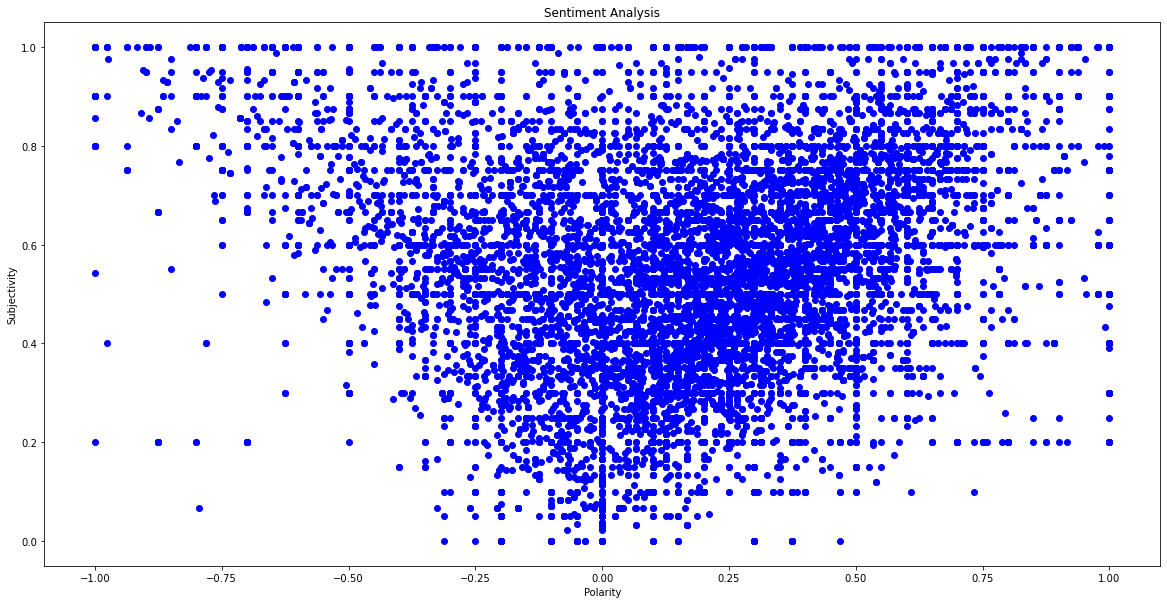

In [18]:
#Plot the polarity and subjectivity
plt.figure(figsize=(20,10))
for i in range(1,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

##Better not run for learge dataset.

In [20]:
#Get the percentage of positive tweets
ptweet=df[df.Analysis=='Positive']
ptweet=ptweet['tweet']
round((ptweet.shape[0]/df.shape[0])*100,1)

49.7

In [22]:
#get the percentage of negative tweets
ntweet=df[df.Analysis=='Negative']
ntweet=ntweet['tweet']
round((ntweet.shape[0]/df.shape[0])*100,1)

14.8

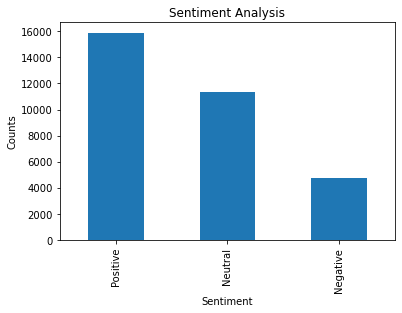

In [23]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind='bar')
plt.show()